## Initialization

In [1]:
import blackhc.notebook

Appended /home/adibi/rmg7/MIP/BatchBALD/src to paths
Switched to directory /home/adibi/rmg7/MIP/BatchBALD
%load_ext autoreload
%autoreload 2


In [2]:
import torch

In [3]:
import al_notebook.results_loader as rl
import al_notebook.plots as alp
from acquisition_functions import AcquisitionFunction
from acquisition_method import AcquisitionMethod
from dataset_enum import DatasetEnum

In [4]:
import numpy as np

In [5]:
import prettyprinter as pp

In [6]:
import matplotlib.pyplot as plt

In [7]:
%matplotlib inline

In [8]:
#MARKERS = ("X", "s", "o")
MARKERS = None

## Common functions


In [9]:
def acc_label_axes(metric):
    plt.xlabel('Acquired dataset size')
    plt.ylabel(metric)

In [17]:
stores = rl.load_experiment_results('EMORY_COVID')

In [18]:
stores.keys()

dict_keys(['EMORY_COVID/covid_full_resnet_binary_scratch_meanstd_9031.py', 'EMORY_COVID/covid_full_resnet_binary_scratch_multibald_254.py', 'EMORY_COVID/covid_full_resnet_binary_scratch_multibald_9031.py', 'EMORY_COVID/covid_full_resnet_binary_scratch_random_58.py', 'EMORY_COVID/covid_full_resnet_binary_scratch_random_254.py', 'EMORY_COVID/covid_full_resnet_binary_scratch_random_9031.py', 'EMORY_COVID/covid_full_resnet_binary_scratch_meanstd_58.py', 'EMORY_COVID/covid_full_resnet_binary_scratch_meanstd_254.py', 'EMORY_COVID/covid_full_resnet_binary_scratch_vr_254.py', 'EMORY_COVID/covid_full_resnet_binary_scratch_multibald_1234.py', 'EMORY_COVID/covid_full_resnet_binary_scratch_multibald_4321.py', 'EMORY_COVID/covid_full_resnet_binary_scratch_multibald_8888.py', 'EMORY_COVID/covid_full_resnet_binary_scratch_multibald_58.py'])

In [19]:
pp.pprint(rl.get_any(stores).args)

al_notebook.results_loader._args(
    experiment_description='COVID BINARY:RESNET BN DROPOUT MEAN STD (SCRATCH)',
    batch_size=16,
    scoring_batch_size=32,
    test_batch_size=64,
    validation_set_size=500,
    early_stopping_patience=3,
    epochs=30,
    epoch_samples=5056,
    num_inference_samples=100,
    available_sample_k=20,
    target_num_acquired_samples=1000,
    target_accuracy=0.9375,
    quickquick=False,
    seed=9031,
    log_interval=20,
    initial_samples_per_class=25,
    initial_samples=None,
    balanced_validation_set=False,
    balanced_test_set=False,
    no_cuda=False,
    experiment_task_id='covid_full_resnet_binary_scratch_meanstd_9031',
    experiments_laaos='./experiment_configs/EMORY_COVID/scratch_binary_config.py',
    type=acquisition_functions.AcquisitionFunction.mean_stddev,
    acquisition_method=acquisition_method.AcquisitionMethod.independent,
    dataset=dataset_enum.DatasetEnum.covid_binary
)


In [20]:
pp.pprint(rl.diff_args(stores))

{
    'experiment_description': {
        'COVID BINARY:RESNET BN DROPOUT VARIATIONAL RATIOS (SCRATCH)',
        'COVID BINARY:RESNET BN DROPOUT MEAN STD (SCRATCH)',
        'COVID BINARY:RESNET BN DROPOUT RANDOM (SCRATCH)',
        'COVID BINARY:RESNET BN DROPOUT MULTI BALD (SCRATCH)'
    },
    'type': {
        acquisition_functions.AcquisitionFunction.bald,
        acquisition_functions.AcquisitionFunction.variation_ratios,
        acquisition_functions.AcquisitionFunction.random,
        acquisition_functions.AcquisitionFunction.mean_stddev
    },
    'acquisition_method': {
        acquisition_method.AcquisitionMethod.multibald,
        acquisition_method.AcquisitionMethod.independent
    },
    'num_acquired_points': {
        1050,
        390,
        330,
        250,
        430,
        210,
        690,
        570,
        310,
        410,
        350
    }
}


In [21]:
# vgg_multi_pretrained_9031.py
stores.keys()

dict_keys(['EMORY_COVID/covid_full_resnet_binary_scratch_meanstd_9031.py', 'EMORY_COVID/covid_full_resnet_binary_scratch_multibald_254.py', 'EMORY_COVID/covid_full_resnet_binary_scratch_multibald_9031.py', 'EMORY_COVID/covid_full_resnet_binary_scratch_random_58.py', 'EMORY_COVID/covid_full_resnet_binary_scratch_random_254.py', 'EMORY_COVID/covid_full_resnet_binary_scratch_random_9031.py', 'EMORY_COVID/covid_full_resnet_binary_scratch_meanstd_58.py', 'EMORY_COVID/covid_full_resnet_binary_scratch_meanstd_254.py', 'EMORY_COVID/covid_full_resnet_binary_scratch_vr_254.py', 'EMORY_COVID/covid_full_resnet_binary_scratch_multibald_1234.py', 'EMORY_COVID/covid_full_resnet_binary_scratch_multibald_4321.py', 'EMORY_COVID/covid_full_resnet_binary_scratch_multibald_8888.py', 'EMORY_COVID/covid_full_resnet_binary_scratch_multibald_58.py'])

# VISUALIZATIONS

{
    'experiment_description': {
        'COVID BINARY:RESNET BN DROPOUT VARIATIONAL RATIOS (SCRATCH)',
        'COVID BINARY:RESNET BN DROPOUT MEAN STD (SCRATCH)',
        'COVID BINARY:RESNET BN DROPOUT RANDOM (SCRATCH)',
        'COVID BINARY:RESNET BN DROPOUT MULTI BALD (SCRATCH)'
    },
    'type': {
        acquisition_functions.AcquisitionFunction.bald,
        acquisition_functions.AcquisitionFunction.variation_ratios,
        acquisition_functions.AcquisitionFunction.random,
        acquisition_functions.AcquisitionFunction.mean_stddev
    },
    'acquisition_method': {
        acquisition_method.AcquisitionMethod.multibald,
        acquisition_method.AcquisitionMethod.independent
    },
    'num_acquired_points': {
        1050,
        390,
        330,
        250,
        430,
        210,
        690,
        570,
        310,
        410,
        350
    }
}
{
    'Mean STD': {
        'num_trials': 3,
        'experiment_description': {
            'COVID BINARY:RESNET

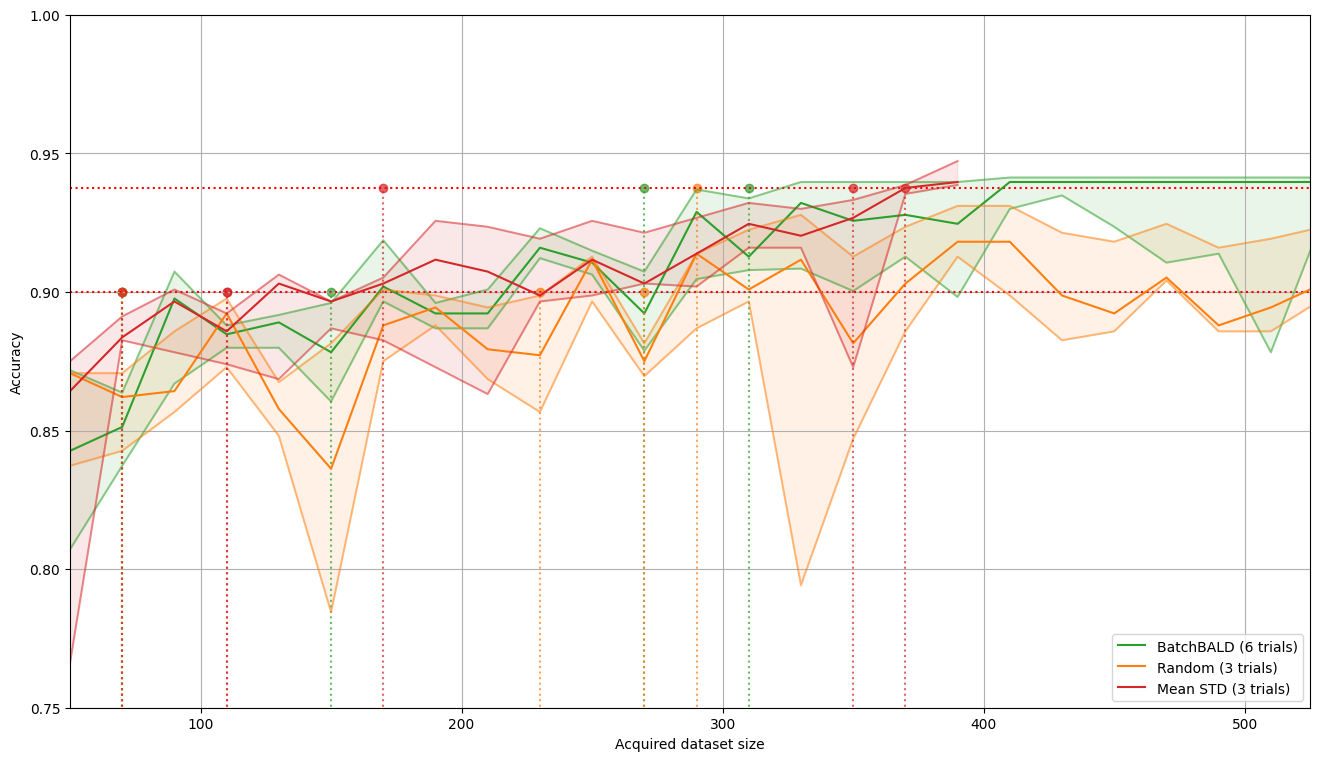

BatchBALD (6 trials):
80% at [150 150 210]
85.3% at [210 270 310]
Random (3 trials):
80% at [ 70. 230. 270.]
85.3% at [130. 650.  inf]
Mean STD (3 trials):
80% at [110 150 310]
85.3% at [170 350 370]


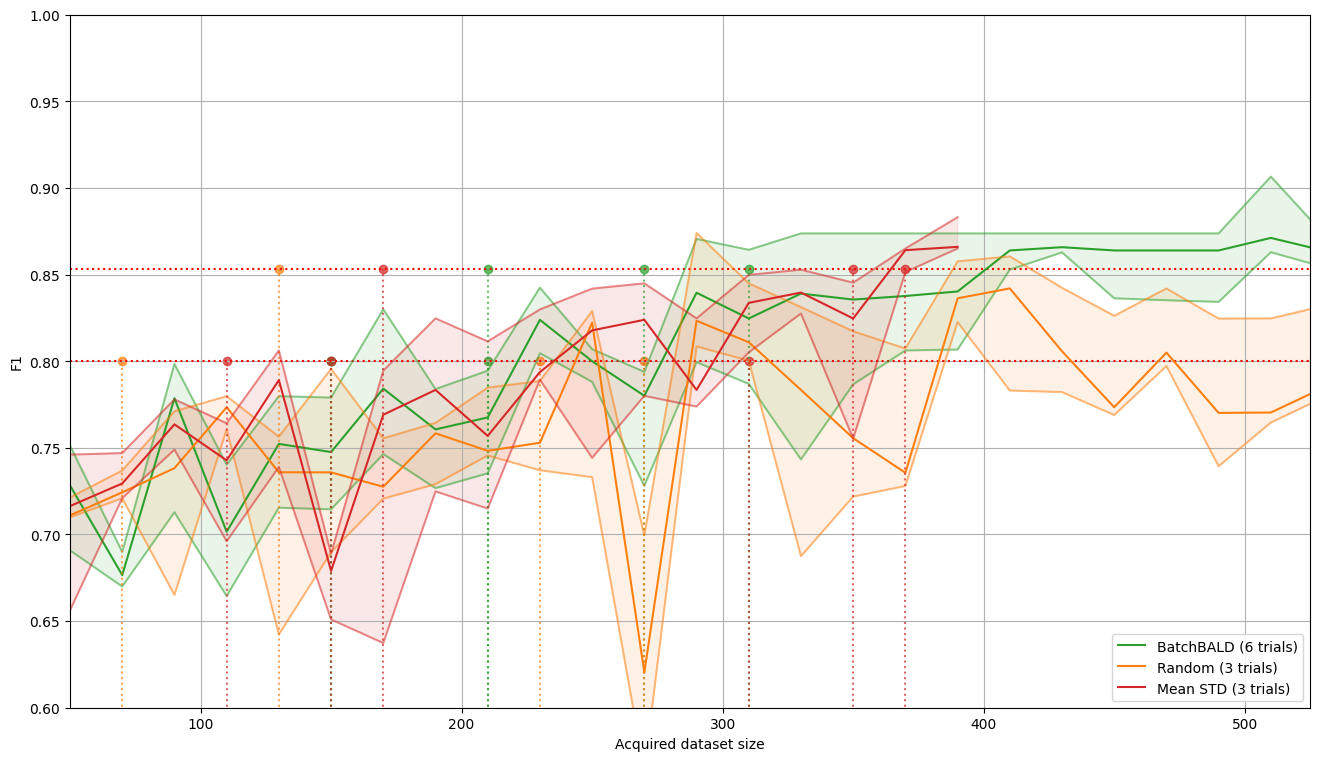

BatchBALD (6 trials):
95% at [0 0 0]
98.96% at [130 210 270]
Random (3 trials):
95% at [0 0 0]
98.96% at [130 370 430]
Mean STD (3 trials):
95% at [0 0 0]
98.96% at [170 170 330]


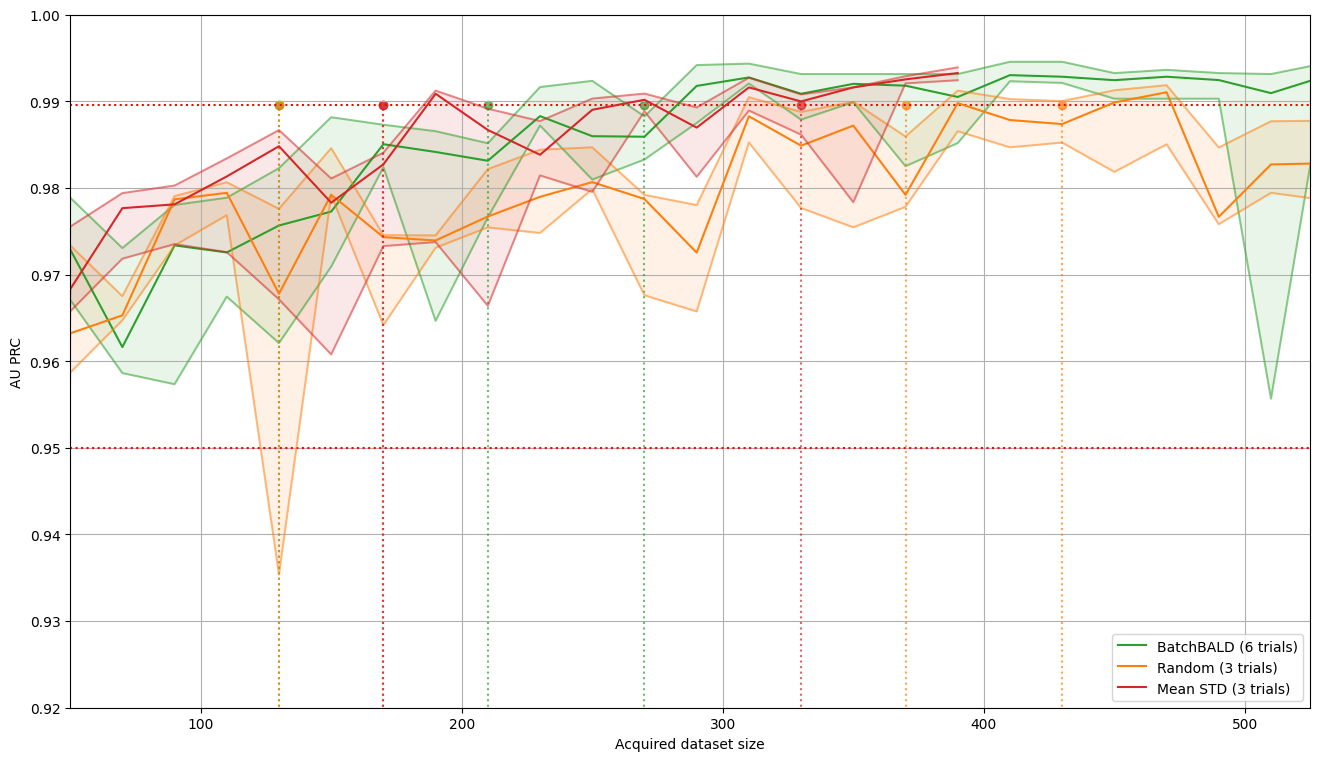

BatchBALD (6 trials):
85% at [110. 170. 210.]
90.99% at [390.  inf  inf]
Random (3 trials):
85% at [150. 270. 310.]
90.99% at [670.  inf  inf]
Mean STD (3 trials):
85% at [ 90. 130. 250.]
90.99% at [130. 350.  inf]


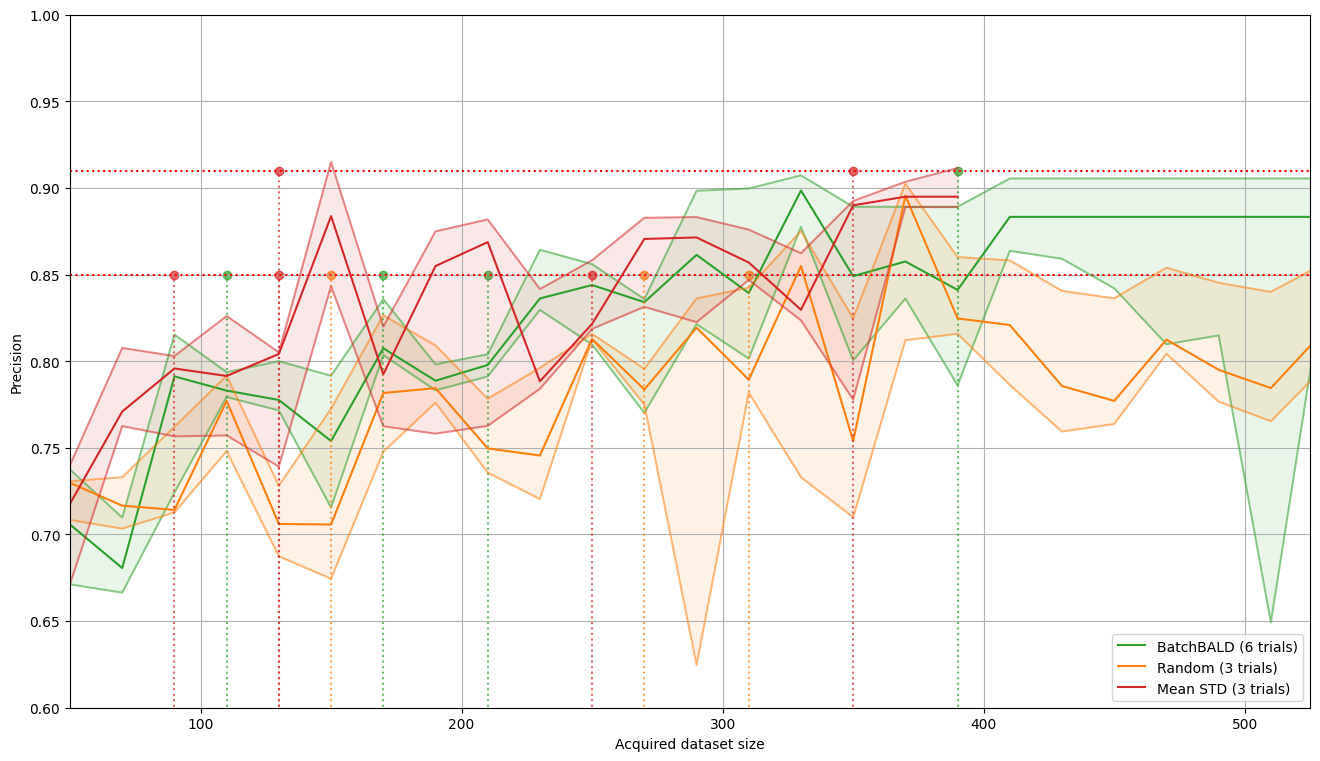

BatchBALD (6 trials):
75% at [ 0  0 50]
81.55% at [ 70 110 150]
Random (3 trials):
75% at [ 0 50 70]
81.55% at [  0 110 230]
Mean STD (3 trials):
75% at [ 0  0 50]
81.55% at [110 150 350]


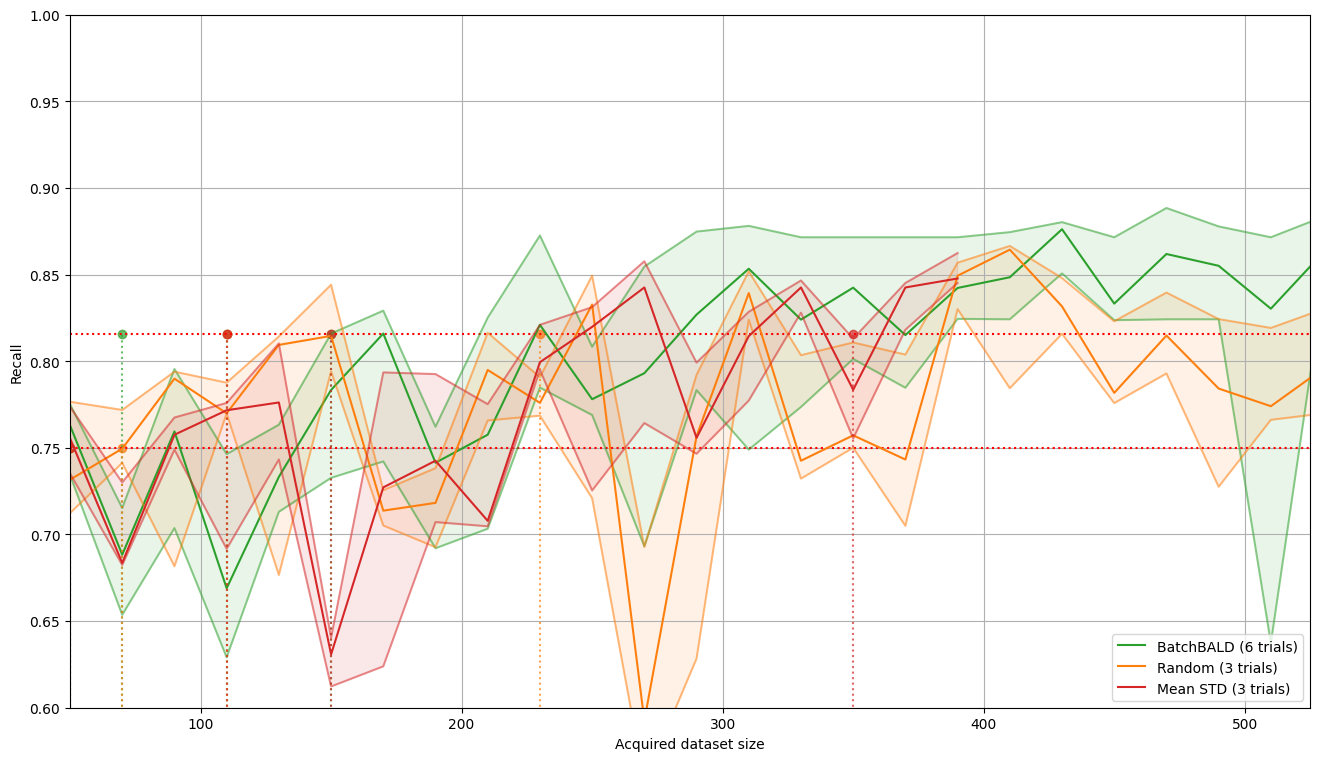

BatchBALD (6 trials):
85% at [ 0  0 90]
91.08% at [130 150 270]
Random (3 trials):
85% at [ 0 50 70]
91.08% at [130 290 330]
Mean STD (3 trials):
85% at [ 0  0 50]
91.08% at [110 150 150]


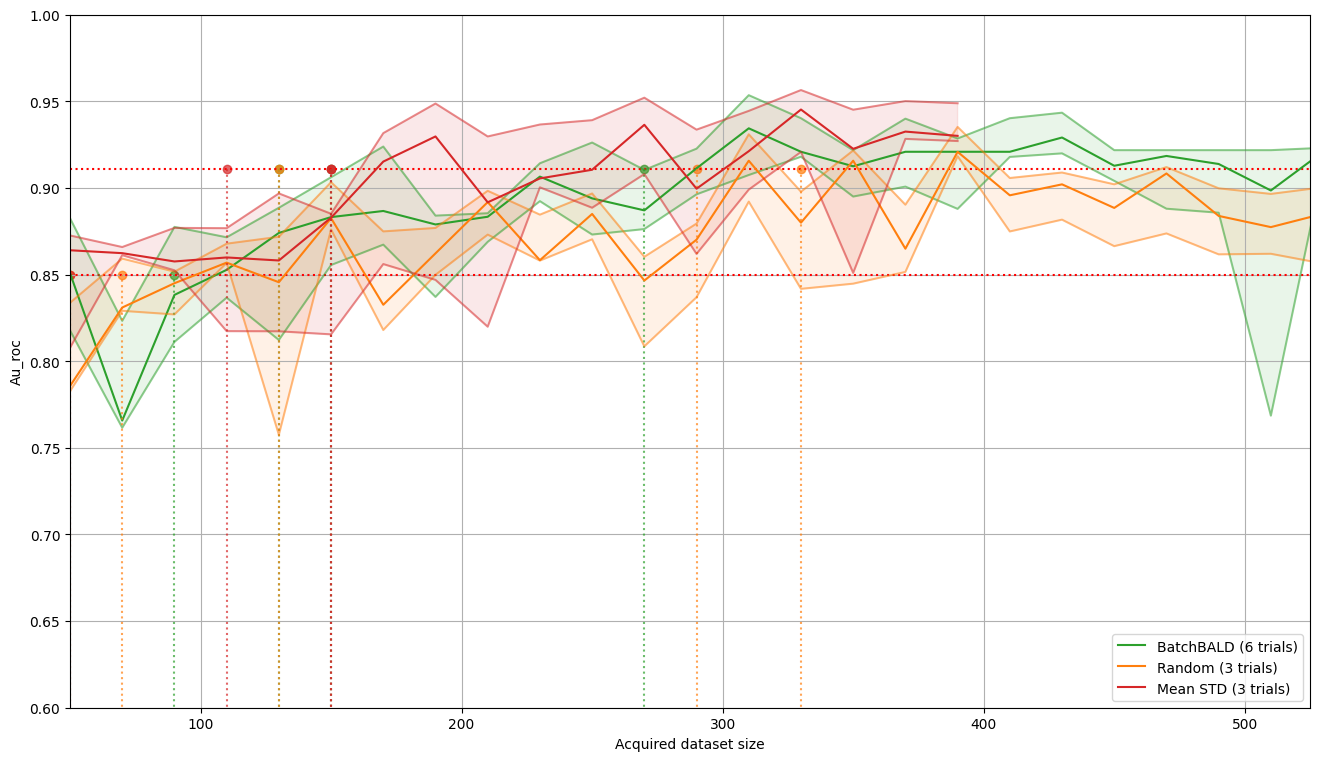

BatchBALD:
0.45% at [0 0 0]
0.3% at [0 0 0]
Random:
0.45% at [0 0 0]
0.3% at [0 0 0]
Mean STD:
0.45% at [0 0 0]
0.3% at [0 0 0]


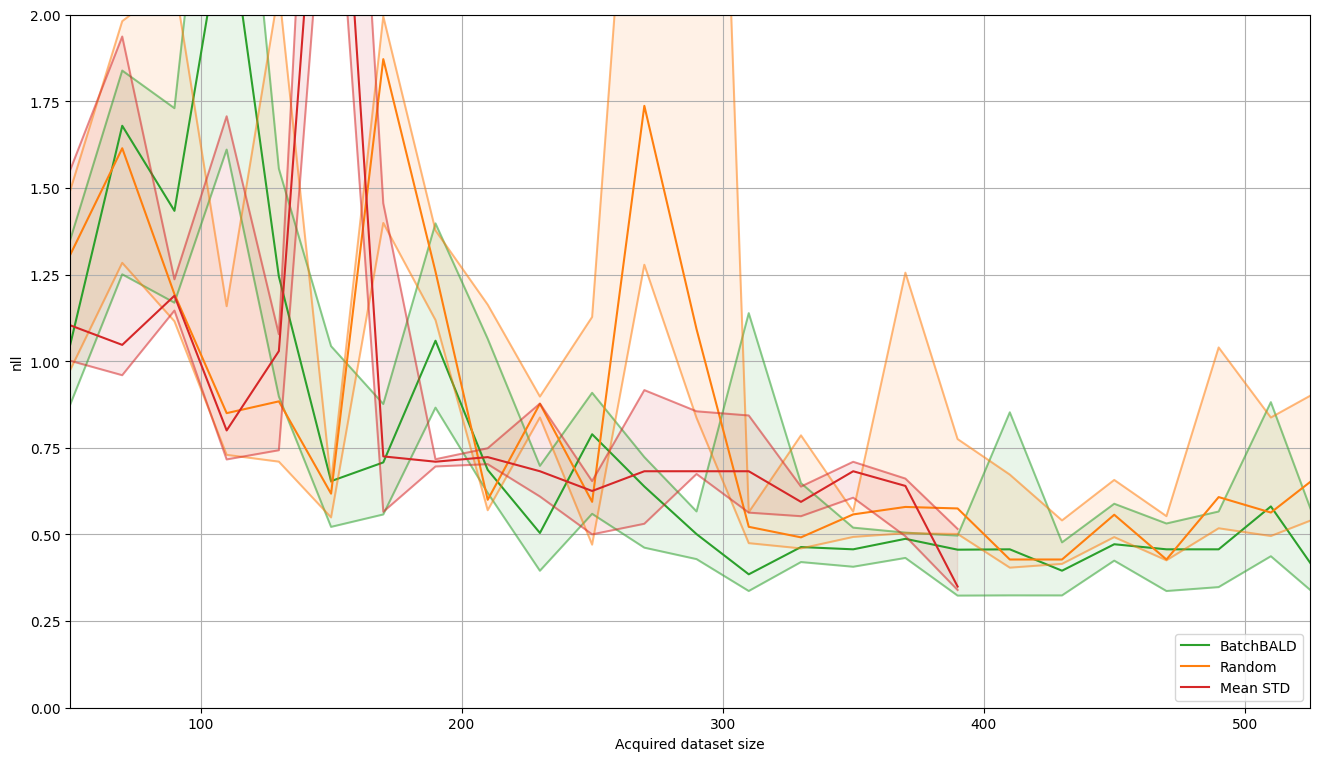

In [23]:
for show_b in (10, ):
    filtered = {}

    def filter_exps(name, store):

        vip_args = rl.get_vip_args(store)

        # if vip_args.ds not in (DatasetEnum.rsna_multi,
        #                        ):  #, DatasetEnum.mnist_w_noise):
        #     return False

        if vip_args.nis == 0:
            return False

    #     if vip_args.nap < 300:
    #         return False

        if (vip_args.am, vip_args.af) in ((AcquisitionMethod.multibald,
                                               AcquisitionFunction.bald),
                                              (AcquisitionMethod.independent,
                                               AcquisitionFunction.bald),
                                              (AcquisitionMethod.independent, 
                                               AcquisitionFunction.random),
                                              (AcquisitionMethod.independent, 
                                               AcquisitionFunction.mean_stddev),
                                              (AcquisitionMethod.independent, 
                                               AcquisitionFunction.variation_ratios)):
            return True

        if vip_args.af != AcquisitionFunction.random:
            if vip_args.k not in (10, ):
                return False

            if vip_args.b not in (show_b, ):
                return False
        return True

    filtered.update(rl.filter_dict(stores, kv=filter_exps))

    pp.pprint(rl.diff_args(filtered))

    def key2text(name, store):

        vip_args = rl.get_vip_args(store)
        am, af = vip_args.am, vip_args.af
        if (am, af) == (AcquisitionMethod.independent,
                        AcquisitionFunction.random):
            return 'Random'
        elif (am, af) == (AcquisitionMethod.independent,
                          AcquisitionFunction.bald):
            return f'BALD'
        elif (am, af) == (AcquisitionMethod.independent,
                          AcquisitionFunction.variation_ratios):
            return f'Var ratios'
        elif (am, af) == (AcquisitionMethod.independent,
                          AcquisitionFunction.mean_stddev):
            return f'Mean STD'
        elif (am, af) == (AcquisitionMethod.multibald,
                          AcquisitionFunction.bald):
            return f'BatchBALD'
        raise ValueError(vip_args)

    #grouped_by = rl.groupby_dict(filtered, key_kv=rl.get_diff_args_key2text(filtered, ('tag',)))
    grouped_by = rl.groupby_dict(filtered, key_kv=key2text)

    pp.pprint(
        rl.map_dict(grouped_by, v=lambda stores: rl.get_stores_info(stores)))

    # TODO: add rl.aggregate_f1 and other methods
    grouped_by_accuracy = rl.map_dict(
        grouped_by,
        v=lambda stores: rl.aggregate_accuracies(stores, thresholds=(90, 93.75)))
    grouped_by_f1 = rl.map_dict(
        grouped_by,
        v=lambda stores: rl.aggregate_f1(stores, thresholds=(80, 85.3)))
    grouped_by_precision = rl.map_dict(
        grouped_by,
        v=lambda stores: rl.aggregate_precision(stores, thresholds=(85, 90.99)))
    grouped_by_recall = rl.map_dict(
        grouped_by,
        v=lambda stores: rl.aggregate_recall(stores, thresholds=(75, 81.55)))
    grouped_by_auroc = rl.map_dict(
        grouped_by,
        v=lambda stores: rl.aggregate_auroc(stores, thresholds=(85, 91.08)))
    grouped_by_auprc = rl.map_dict(
        grouped_by,
        v=lambda stores: rl.aggregate_auprc(stores, thresholds=(95, 98.96)))
    grouped_by_loss = rl.map_dict(
        grouped_by,
        v=lambda stores: rl.aggregate_loss(stores, thresholds=(0.45, 0.3)))
    # grouped_by_sensitivity = rl.map_dict(
    #     grouped_by,
    #     v=lambda stores: rl.aggregate_sensitivity(stores, thresholds=(90, 93.75)))
    # grouped_by_specificity = rl.map_dict(
    #     grouped_by,
    #     v=lambda stores: rl.aggregate_specificity(stores, thresholds=(90, 93.75)))

    #sorted_dict = rl.sort_dict(grouped_by, v=rl.get_threshold_quantiles_key)

    acquisition_functions_list = ['BatchBALD', 'Random', 'BALD', 'Var ratios', 'Mean STD']
    acquisition_functions_list = ['BatchBALD', 'Random', 'Mean STD']

    sorted_dict_accuracy = {
        key: grouped_by_accuracy[key]
        for key in acquisition_functions_list
    }

    sorted_dict_f1= {
        key: grouped_by_f1[key]
        for key in acquisition_functions_list
    }

    sorted_dict_precision= {
        key: grouped_by_precision[key]
        for key in acquisition_functions_list
    }

    sorted_dict_recall= {
        key: grouped_by_recall[key]
        for key in acquisition_functions_list
    }

    sorted_dict_auroc= {
        key: grouped_by_auroc[key]
        for key in acquisition_functions_list
    }

    sorted_dict_auprc = {
        key: grouped_by_auprc[key]
        for key in acquisition_functions_list
    }

    sorted_dict_loss = {
        key: grouped_by_loss[key]
        for key in acquisition_functions_list
    }

    # sorted_dict_sensitivity = {
    # key: grouped_by_sensitivity[key]
    # for key in acquisition_functions_list
    # }
    
    # sorted_dict_specificity = {
    #     key: grouped_by_specificity[key]
    #     for key in acquisition_functions_list
    # }

    figsize = (16, 9)

    ##### ACCURACY #####
    metric = 'accuracy'
    plt.figure(figsize=figsize)
    #plt.title("RMNIST")
    alp.plot_aggregated_groups(sorted_dict_accuracy,
                               show_num_trials=True,
                               show_quantiles=True,
                               show_thresholds=True)
    plt.axis([50, 525, 0.75, 1])
    acc_label_axes(metric=metric.capitalize())
    plt.grid(True)
    plt.legend(loc='lower right')

    output_path = blackhc.notebook.original_dir + f'/RSNA_multi_{metric}.png'
    alp.plot_save(output_path, dpi=300)
    plt.show()

    ##### F1 #####
    metric = 'f1'
    plt.figure(figsize=figsize)
    #plt.title("RMNIST")
    alp.plot_aggregated_groups(sorted_dict_f1,
                               show_num_trials=True,
                               show_quantiles=True,
                               show_thresholds=True)
    plt.axis([50, 525, 0.60, 1])
    acc_label_axes(metric=metric.capitalize())
    plt.grid(True)
    plt.legend(loc='lower right')

    output_path = blackhc.notebook.original_dir + f'/RSNA_multi_{metric}.png'
    alp.plot_save(output_path, dpi=300)
    plt.show()

    ##### AU PRC #####
    metric = 'AU_PRC'
    plt.figure(figsize=figsize)
    #plt.title("RMNIST")
    alp.plot_aggregated_groups(sorted_dict_auprc,
                               show_num_trials=True,
                               show_quantiles=True,
                               show_thresholds=True)
    plt.axis([50, 525, 0.92, 1])
    acc_label_axes(metric='AU PRC')
    plt.grid(True)
    plt.legend(loc='lower right')

    output_path = blackhc.notebook.original_dir + f'/RSNA_multi_{metric}.png'
    alp.plot_save(output_path, dpi=300)
    plt.show()

    ##### PRECISION #####
    metric = 'precision'
    plt.figure(figsize=figsize)
    #plt.title("RMNIST")
    alp.plot_aggregated_groups(sorted_dict_precision,
                               show_num_trials=True,
                               show_quantiles=True,
                               show_thresholds=True)
    plt.axis([50, 525, 0.60, 1])
    acc_label_axes(metric=metric.capitalize())
    plt.grid(True)
    plt.legend(loc='lower right')

    output_path = blackhc.notebook.original_dir + f'/RSNA_multi_{metric}.png'
    alp.plot_save(output_path, dpi=300)
    plt.show()

    ##### RECALL #####
    metric = 'recall'
    plt.figure(figsize=figsize)
    #plt.title("RMNIST")
    alp.plot_aggregated_groups(sorted_dict_recall,
                               show_num_trials=True,
                               show_quantiles=True,
                               show_thresholds=True)
    plt.axis([50, 525, 0.60, 1])
    acc_label_axes(metric=metric.capitalize())
    plt.grid(True)
    plt.legend(loc='lower right')

    output_path = blackhc.notebook.original_dir + f'/RSNA_multi_{metric}.png'
    alp.plot_save(output_path, dpi=300)
    plt.show()

    ##### AU ROC #####
    metric = 'AU_ROC'
    plt.figure(figsize=figsize)
    #plt.title("RMNIST")
    alp.plot_aggregated_groups(sorted_dict_auroc,
                               show_num_trials=True,
                               show_quantiles=True,
                               show_thresholds=True)
    plt.axis([50, 525, 0.60, 1])
    acc_label_axes(metric=metric.capitalize())
    plt.grid(True)
    plt.legend(loc='lower right')

    output_path = blackhc.notebook.original_dir + f'/RSNA_multi_{metric}.png'
    alp.plot_save(output_path, dpi=300)
    plt.show()

    ##### LOSS #####
    metric = 'nll'
    plt.figure(figsize=figsize)
    #plt.title("RMNIST")
    alp.plot_aggregated_groups(sorted_dict_loss,
                               show_num_trials=False,
                               show_quantiles=False,
                               show_thresholds=False)
    plt.axis([50, 525, 0.0, 2])
    acc_label_axes(metric=metric)
    plt.grid(True)
    plt.legend(loc='lower right')

    output_path = blackhc.notebook.original_dir + f'/RSNA_multi_{metric}.png'
    alp.plot_save(output_path, dpi=300)
    plt.show()

    # ##### SENSITIVITY #####
    # metric = 'sensitivity'
    # plt.figure(figsize=figsize)
    # alp.plot_aggregated_groups(sorted_dict_sensitivity,
    #                            show_num_trials=True,
    #                            show_quantiles=True,
    #                            show_thresholds=True)
    # plt.axis([50, 525, 0.60, 1])
    # acc_label_axes(metric=metric.capitalize())
    # plt.grid(True)
    # plt.legend(loc='lower right')
    
    # output_path = blackhc.notebook.original_dir + f'/RSNA_multi_{metric}.png'
    # alp.plot_save(output_path, dpi=300)
    # plt.show()
    
    # ##### SPECIFICITY #####
    # metric = 'specificity'
    # plt.figure(figsize=figsize)
    # alp.plot_aggregated_groups(sorted_dict_specificity,
    #                            show_num_trials=True,
    #                            show_quantiles=True,
    #                            show_thresholds=True)
    # plt.axis([50, 525, 0.60, 1])
    # acc_label_axes(metric=metric.capitalize())
    # plt.grid(True)
    # plt.legend(loc='lower right')
    
    # output_path = blackhc.notebook.original_dir + f'/RSNA_multi_{metric}.png'
    # alp.plot_save(output_path, dpi=300)
    # plt.show()